In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [2]:
config_file = '/home/marcosmejia/UB/Github/mmdetection/tools/Checkpoint_95_5/mask_rcnn_x50_32x4d_fpn_gn_ws-all_20_23_24e_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '/home/marcosmejia/UB/Github/mmdetection/NewVal_CkpEp19/epoch_39.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [165]:
# test a single image
import os, random
from pathlib import Path
im_dir = Path("/media/HDD_4TB_1/Datasets/AICrowd_newval/val/images")
#im_dir = '/media/HDD_4TB_1/Datasets/food_dataset/test'
img_name = random.choice(os.listdir(im_dir))

img_path = im_dir / img_name

result = inference_detector(model, img_path )

img_name

'047633.jpg'

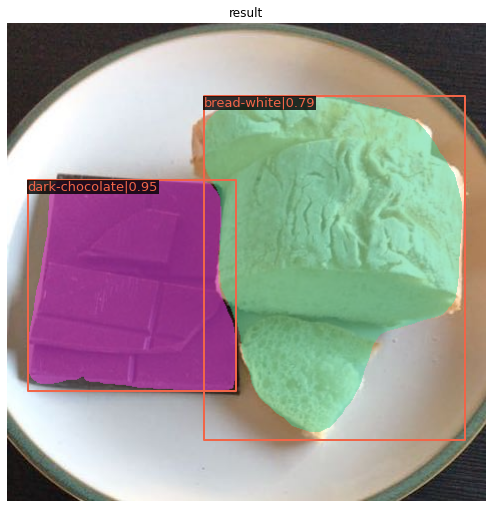

In [166]:

show_result_pyplot(model, img_path, result)

In [167]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import skimage.io as io
import matplotlib.pyplot as plt

PATH = im_dir.parents[0] / 'val_annotations_fixed.json'
coco = COCO(PATH)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


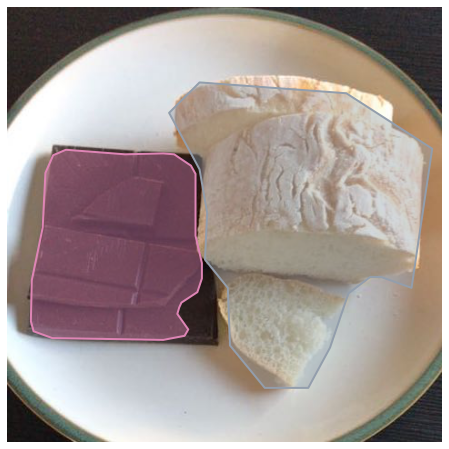

In [168]:
# Select a random image:
random_image_id = random.choice(coco.getImgIds())
id_from_mmdet = int(img_name.split('.')[0])
img = coco.loadImgs(id_from_mmdet)[0]
# Show image 
image_path = os.path.join(im_dir, img["file_name"])
I = io.imread(image_path)

annotation_ids = coco.getAnnIds(imgIds=img['id'])
annotations = coco.loadAnns(annotation_ids)

plt.figure(figsize= (8,8))
plt.imshow(I); plt.axis('off')
# Render annotations on top of the image
coco.showAnns(annotations,draw_bbox=False)


In [169]:
for annotation in annotations:     
    print('  - ',coco.loadCats([annotation['category_id']])[0]['name'],annotation['category_id'],end='\n')

  -  bread-white 1566
  -  dark-chocolate 2131
